In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.drop(columns="ID",inplace=True,axis=1)

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


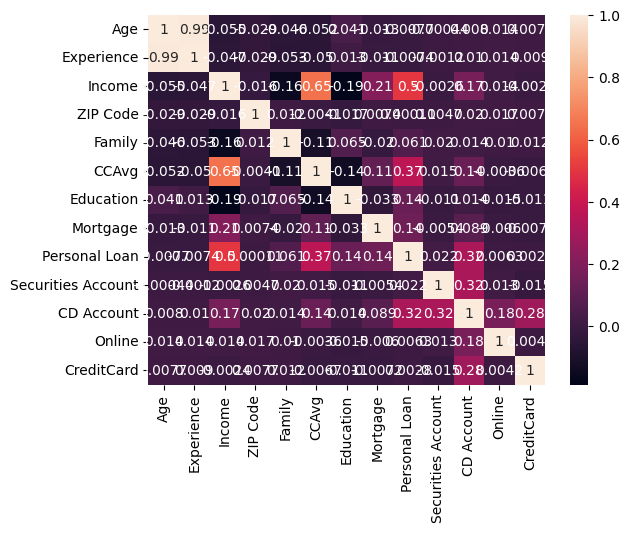

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

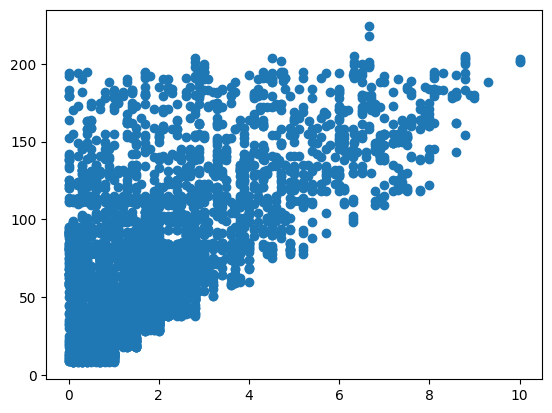

In [ ]:
plt.scatter(df["CCAvg"],df["Income"])

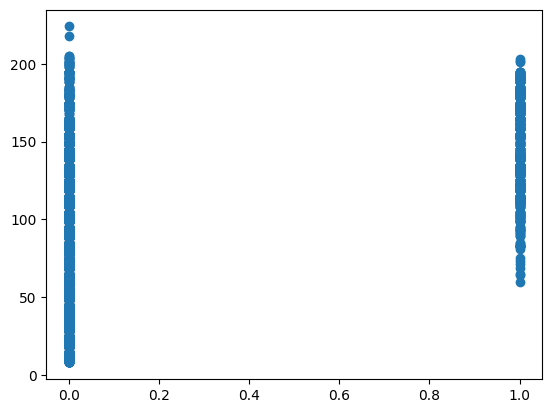

In [ ]:
plt.scatter(df["Personal Loan"],df["Income"])

In [ ]:
df.drop(columns="ZIP Code",inplace=True,axis=1)

In [ ]:
df.drop(columns="CreditCard",inplace=True,axis=1)

In [ ]:
X = df.drop(columns = ["Income"])
y = df["Income"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 10)
(1000, 10)
(4000,)
(1000,)


In [ ]:
model = LinearRegression()

In [ ]:
hist = model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
1501,35,44.854984
2586,149,172.275137
2653,121,111.350918
1055,62,69.510773
705,30,45.929025


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

24.568340945488067

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
ms_scaler = MinMaxScaler((0,1))
ss_scaler = StandardScaler()

scaled_X_train = ms_scaler.fit_transform(X_train)
scaled_X_test = ms_scaler.transform(X_test)

scaled_X_train = ss_scaler.fit_transform(scaled_X_train)
scaled_X_test = ss_scaler.transform(scaled_X_test)

In [ ]:
model = LinearRegression()
hist = model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
1501,35,44.854984
2586,149,172.275137
2653,121,111.350918
1055,62,69.510773
705,30,45.929025


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

24.56834094548806

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

931.38291118772

In [ ]:
metrics.r2_score(y_test,y_pred)

0.5607763636536887

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_converter = PolynomialFeatures(2)
poly_feature = poly_converter.fit(X_train)
poly_feature = poly_converter.transform(X_train)
poly_feature_test = poly_converter.transform(X_test)
print(X_train.shape)
print(poly_feature.shape)

(4000, 10)
(4000, 66)


In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_feature, y_train)

LinearRegression()

In [ ]:
y_pred = poly_model.predict(poly_feature)
metrics.mean_absolute_error(y_train,y_pred)

22.142085576843336

In [ ]:
y_pred = poly_model.predict(poly_feature_test)
metrics.mean_absolute_error(y_test,y_pred)

22.22665688732465